In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install tueplots
from tueplots import bundles
plt.rcParams.update(bundles.neurips2021(usetex=False))

In [2]:

results_2019 = pd.read_csv("/content/bac-results-2019.csv", index_col=0)
results_2020 = pd.read_csv("/content/bac-results-2020.csv", index_col=0)
results_2021 = pd.read_csv("/content/bac-results-2021.csv", index_col=0)

results_2019 = results_2019.apply(pd.to_numeric, errors='coerce').fillna(results_2019)
results_2020 = results_2020.apply(pd.to_numeric, errors='coerce').fillna(results_2020)
results_2021 = results_2021.apply(pd.to_numeric, errors='coerce').fillna(results_2021)

results_2019.fillna('', inplace=True)
results_2020.fillna('', inplace=True)
results_2021.fillna('', inplace=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns', None)
display(results_2019.head())
print(results_2019.columns)

,id,county_rank,country_rank,high_school,county,prev_promotion,school_type,specialization,romanian_competency,romanian_written,romanian_written_appeal,romanian_written_final,mother_tongue,mother_tongue_competency,mother_tongue_written,mother_tongue_written_appeal,mother_tongue_written_final,modern_language,modern_language_results,mandatory_subject,mandatory_subject_written,mandatory_subject_written_appeal,mandatory_subject_written_final,elective_subject,elective_subject_written,elective_subject_written_appeal,elective_subject_written_final,digital_competencies,final_grade,successful
0,AB110322,1843,96667,"LICEUL TEHNOLOGIC ""ALEXANDRU DOMSA"" ALBA IULIA",AB,DA,Zi,TEHNICIAN PROIECTANT CAD,Utilizator experimentat,5,,5,,,,,,LIMBA ENGLEZA,B2-B1-A2-B2-B2,MATEMATICA TEHN,7.25,,7.25,BIOLOGIE VEGETALA SI ANIMALA,3.7,,3.7,Utilizator experimentat,,Respins
1,AB110406,1844,96668,LICEUL TEHNOLOGIC AIUD,AB,DA,Zi,TEHNICIAN ELECTROTEHNIST,Utilizator experimentat,5,,5,,,,,,LIMBA ENGLEZA,B1-A2-A2-B2-B2,MATEMATICA TEHN,2.7,,2.7,BIOLOGIE VEGETALA SI ANIMALA,7.2,,7.2,Utilizator avansat,,Respins
2,AB112567,1845,96669,LICEUL TEHNOLOGIC SILVIC CIMPENI,AB,DA,Seral,TEHNICIAN MECATRONIST,Utilizator experimentat,6,,6,,,,,,LIMBA FRANCEZA,A1-A1-B2-A1-A1,MATEMATICA TEHN,1,,1,BIOLOGIE VEGETALA SI ANIMALA,7.45,,7.45,Utilizator nivel mediu,,Respins
3,AB115225,1846,96670,LICEUL TEHNOLOGIC SILVIC CIMPENI,AB,DA,Zi,TEHNICIAN IN SILVICULTURA SI EXPLOATARI FOREST...,Utilizator experimentat,5.25,,5.25,,,,,,LIMBA ENGLEZA,B1-B1--A2-A2,MATEMATICA TEHN,5.95,,5.95,BIOLOGIE VEGETALA SI ANIMALA,2.3,,2.3,Utilizator nivel mediu,,Respins
4,AB116350,2513,136007,LICEUL TEHNOLOGIC SILVIC CIMPENI,AB,DA,Zi,TEHNICIAN DESIGNER MOBILA SI AMENAJARI INTERIOARE,Utilizator experimentat,Eliminat din examen,,Eliminat din examen,,,,,,LIMBA ENGLEZA,A2-A2--A2-A2,MATEMATICA TEHN,5.15,,5.15,BIOLOGIE VEGETALA SI ANIMALA,5.85,,5.85,Utilizator avansat,,Eliminat din examen


Index(['id', 'county_rank', 'country_rank', 'high_school', 'county',
       'prev_promotion', 'school_type', 'specialization',
       'romanian_competency', 'romanian_written', 'romanian_written_appeal',
       'romanian_written_final', 'mother_tongue', 'mother_tongue_competency',
       'mother_tongue_written', 'mother_tongue_written_appeal',
       'mother_tongue_written_final', 'modern_language',
       'modern_language_results', 'mandatory_subject',
       'mandatory_subject_written', 'mandatory_subject_written_appeal',
       'mandatory_subject_written_final', 'elective_subject',
       'elective_subject_written', 'elective_subject_written_appeal',
       'elective_subject_written_final', 'digital_competencies', 'final_grade',
       'successful'],
      dtype='object')


In [4]:
ro = 'romanian_written_final'
mo = 'mother_tongue_written_final'
ma = 'mandatory_subject_written_final'
el = 'elective_subject_written_final'

results_2019_2 = results_2019[results_2019[[ro, mo, ma, el]].applymap(lambda x: np.isreal(x) or x == '').all(1)]

results_all = pd.concat([results_2019_2, results_2020, results_2021], ignore_index=True, sort=False)

nr_romanian_only = len(results_all[results_all['mother_tongue'] == ''])
nr_romanian_plus = len(results_all[results_all['mother_tongue'] != ''])
print(nr_romanian_only)
print(nr_romanian_plus)
print(nr_romanian_only + nr_romanian_plus)

396912
20921
417833


In [5]:
romanian_only_results = results_all[ \
    (results_all['mother_tongue'] == '') & \
    (results_all['romanian_written_final'] >= 1.0)]
romanian_plus_results = results_all[ \
    (results_all['mother_tongue'] != '') & \
    (results_all['romanian_written_final'] >= 1.0)]

romanian_only_results_filtered = romanian_only_results[ \
    (romanian_only_results['mandatory_subject_written_final'] >= 1.0) & \
    (romanian_only_results['elective_subject_written_final'] >= 1.0)].copy()
romanian_plus_results_filtered = romanian_plus_results[ \
    (romanian_plus_results['mandatory_subject_written_final'] >= 1.0) & \
    (romanian_plus_results['elective_subject_written_final'] >= 1.0) & \
    (romanian_plus_results['mother_tongue_written_final'] >= 1.0)].copy()


romanian_only_results_filtered.loc[:, 'total_average'] = romanian_only_results_filtered.loc[:, [ro, ma, el]].mean(axis=1)
romanian_plus_results_filtered.loc[:, 'total_average'] = romanian_plus_results_filtered.loc[:, [ro, ma, el, mo]].mean(axis=1)

print("Romanians' average grade: {:0.3f}".format(romanian_only_results_filtered['total_average'].mean()))
print("Minorities' average grade: {:0.3f}".format(romanian_plus_results_filtered['total_average'].mean()))
# Romanians' overall grades are worse (by only 0.01), so everything is right, right?

print("\nRomanians' average Romanian: {:0.3f}".format(romanian_only_results_filtered[ro].mean()))
print("Minorities' average Romanian: {:0.3f}".format(romanian_plus_results_filtered[ro].mean()))
romanian_plus_results_filtered[ro] = pd.to_numeric(romanian_plus_results_filtered[ro])
display(romanian_plus_results_filtered.groupby(['mother_tongue'])[ro].mean())
print("Minorities' average Mother tongue: {:0.3f}".format(romanian_plus_results_filtered[mo].mean()))
romanian_plus_results_filtered[mo] = pd.to_numeric(romanian_plus_results_filtered[mo])
display(romanian_plus_results_filtered.groupby(['mother_tongue'])[mo].mean())
# But the Romanian grades of the minorities are much worse (1.22),
# and minorities are getting better grades in their mother tongues (0.57)


romanian_only_results_filtered.loc[:, 'subject_average'] = romanian_only_results_filtered.loc[:, [ma, el]].mean(axis=1)
romanian_plus_results_filtered.loc[:, 'subject_average'] = romanian_plus_results_filtered.loc[:, [ma, el]].mean(axis=1)

print("\nRomanians' average subject grade: {:0.3f}".format(romanian_only_results_filtered['subject_average'].mean()))
print("Minorities' average subject grade: {:0.3f}".format(romanian_plus_results_filtered['subject_average'].mean()))
display(romanian_plus_results_filtered.groupby(['mother_tongue'])['subject_average'].mean())
# The non-language grades are also 0.294 better for minorities (which is a clear win)

Romanians' average grade: 6.946
Minorities' average grade: 6.958

Romanians' average Romanian: 7.061
Minorities' average Romanian: 5.841


mother_tongue
LIMBA CROATA             6.230952
LIMBA GERMANA            8.298246
LIMBA ITALIANA           7.546067
LIMBA MAGHIARA (REAL)    5.471993
LIMBA MAGHIARA (UMAN)    5.666270
LIMBA SARBA              5.591803
LIMBA SLOVACA            5.655682
LIMBA TURCA              4.856667
LIMBA UCRAINEANA         5.495455
Name: romanian_written_final, dtype: float64

Minorities' average Mother tongue: 7.630


mother_tongue
LIMBA CROATA             8.457143
LIMBA GERMANA            7.886808
LIMBA ITALIANA           8.360112
LIMBA MAGHIARA (REAL)    7.584354
LIMBA MAGHIARA (UMAN)    7.627776
LIMBA SARBA              7.751639
LIMBA SLOVACA            8.035227
LIMBA TURCA              8.166667
LIMBA UCRAINEANA         7.262762
Name: mother_tongue_written_final, dtype: float64


Romanians' average subject grade: 6.888
Minorities' average subject grade: 7.182


mother_tongue
LIMBA CROATA             6.194048
LIMBA GERMANA            8.269606
LIMBA ITALIANA           6.661236
LIMBA MAGHIARA (REAL)    6.941918
LIMBA MAGHIARA (UMAN)    7.603987
LIMBA SARBA              5.987705
LIMBA SLOVACA            6.516477
LIMBA TURCA              5.555000
LIMBA UCRAINEANA         4.930070
Name: subject_average, dtype: float64

In [6]:
display(results_all[results_all['successful'] != ''].groupby(['successful']).size().reset_index(name='count'))

display(romanian_only_results_filtered[romanian_only_results_filtered['successful'] != ''].groupby(['successful']).size().reset_index(name='count'))
display(romanian_plus_results_filtered[romanian_plus_results_filtered['successful'] != ''].groupby(['successful']).size().reset_index(name='count'))

,successful,count
0,ELIMINAT DIN EXAMEN,415
1,NEPREZENTAT,14385
2,Neprezentat,377
3,RESPINS,90456
4,REUSIT,184058
5,Respins,39551
6,Reusit,88591


,successful,count
0,NEPREZENTAT,5
1,Neprezentat,370
2,RESPINS,85645
3,REUSIT,175137
4,Respins,37000
5,Reusit,84323


,successful,count
0,Neprezentat,7
1,RESPINS,4811
2,REUSIT,8921
3,Respins,2551
4,Reusit,4268


Even with this, more minorities are passing the exams (final avg >= 6.0).

This all does not imply that minorities are smarter, possible reasons include:
- only the smarter minorities attempt the exam (and if it is true, the fact that they still end up with the same avg results is the disadvantage)
  - this is also supported by the fact that only 5% of the results are from minorities, but Romania has at least 11%
  - but many minorities go to romanian schools (by choice or due to lack of other options)
- minority schools might be better
sok minority van roman suliban
- minority exam graders might be less severe

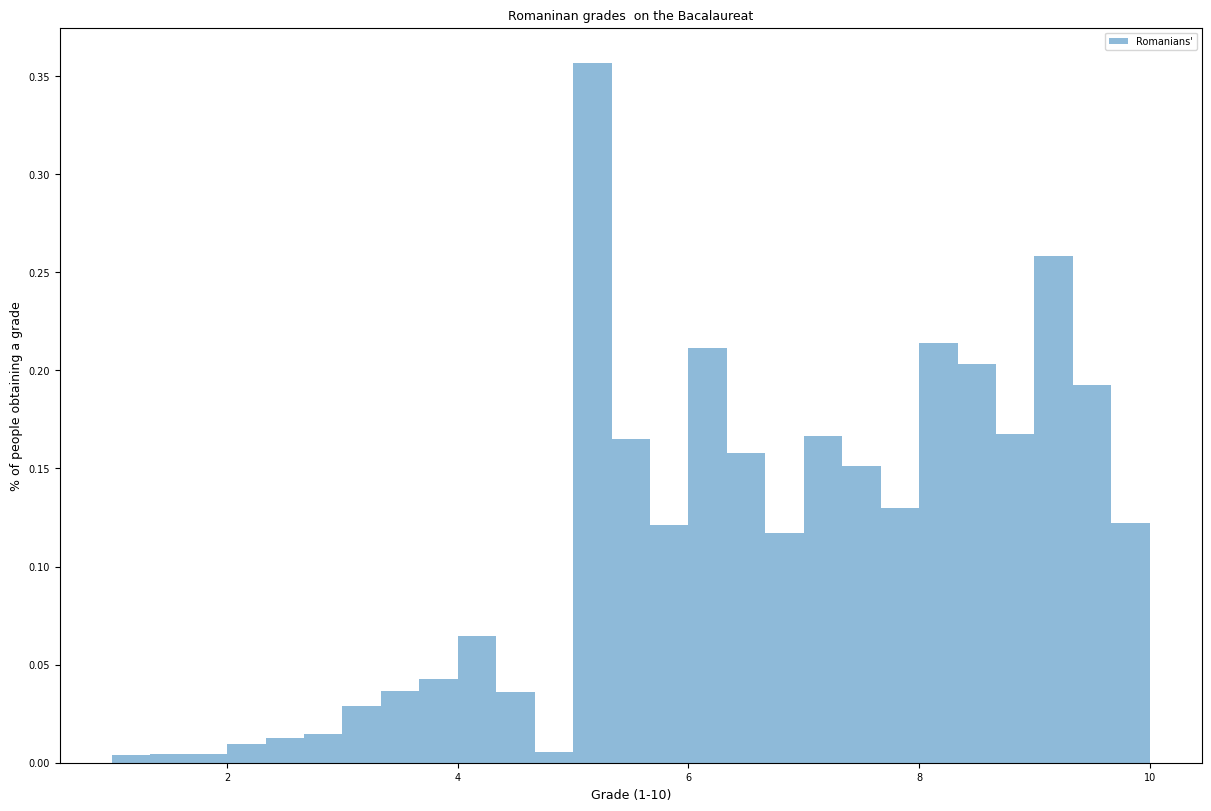

In [15]:
with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):
  fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

  ax.hist(romanian_only_results_filtered['romanian_written_final'].to_list(), bins=27, density=True, alpha = 0.5)

  # rorf_sample = romanian_only_results_filtered.sample(500)
  # asd = list(zip(rorf_sample['romanian_written_final'].to_list(), rorf_sample['subject_average'].to_list()))
  # asd2 = pd.DataFrame(asd, columns=['romanian_written_final','subject_average'])
  # gridobj = sns.lmplot(x="romanian_written_final", y="subject_average", data=asd2, 
  #                      height=7, aspect=1.6, robust=True, palette='tab10', 
  #                      scatter_kws=dict(s=5, linewidths=.7, edgecolors='black'))
  # 
  # ax.scatter(rorf_sample['romanian_written_final'].to_list(), rorf_sample['subject_average'].to_list(), cmap='Purples', marker=',', s=1)

  # ax.hist2d(romanian_only_results_filtered['romanian_written_final'].to_list(), romanian_only_results_filtered['subject_average'].to_list(), cmap='binary', bins=45)

  # ax.hexbin(romanian_plus_results_filtered['mother_tongue_written_final'].to_list(), romanian_plus_results_filtered['subject_average'].to_list(), gridsize=30)

  # ax.hist(romanian_plus_results['romanian_written_final'].to_list(), bins=18, density=True, alpha = 0.5)

  ax.legend(["Romanians'", "Minorities'"])
  ax.set_title('Romaninan grades  on the Bacalaureat')
  ax.set_xlabel('Grade (1-10)')
  ax.set_ylabel('% of people obtaining a grade')

  # this file can now by used as \includegraphics{filename}
  plt.show()
  # fig.savefig('figname_neurips.pdf', bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


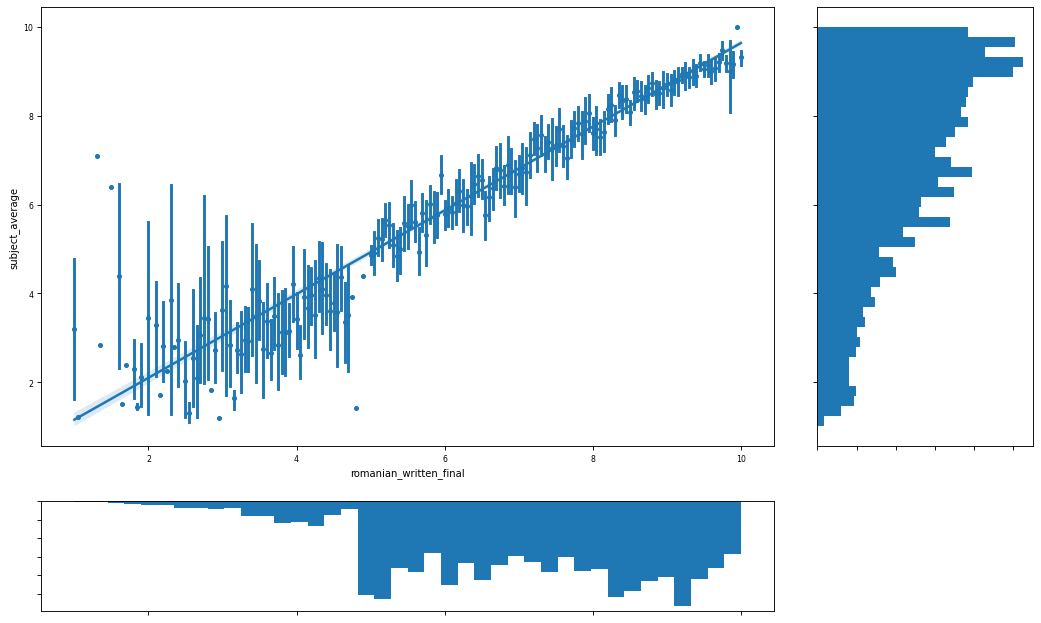

In [60]:
with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):
  fig = plt.figure(figsize=(16, 10), dpi= 80)
  grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

  # Define the axes
  ax_main = fig.add_subplot(grid[:-1, :-1])
  ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
  ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

  # data prep
  rorf_sample = romanian_only_results_filtered.sample(5000)
  asd = list(zip(rorf_sample['romanian_written_final'].to_list(), rorf_sample['subject_average'].to_list()))
  asd2 = pd.DataFrame(asd, columns=['romanian_written_final','subject_average'])

  # Scatterplot on main ax
  #ax_main.scatter('romanian_written_final', 'subject_average', s=1, alpha=.5, data=rorf_sample, edgecolors='gray', linewidths=.5)
  # gridobj = sns.lmplot(x="romanian_written_final", y="subject_average", data=asd2,
  #                      height=7, aspect=1.6, robust=True, palette='tab10', 
  #                      scatter_kws=dict(s=5, linewidths=.5, edgecolors='black'))
  sns.regplot(x="romanian_written_final", y="subject_average", data=asd2, ax=ax_main, marker='.', x_estimator=np.mean)

  # histogram on the right
  ax_bottom.hist(rorf_sample['romanian_written_final'], 40, histtype='stepfilled', orientation='vertical')
  ax_bottom.invert_yaxis()

  # histogram in the bottom
  ax_right.hist(rorf_sample['subject_average'], 40, histtype='stepfilled', orientation='horizontal')

  ax.set_title('Romaninan grades on the Bacalaureat')
  ax.set_xlabel('romanian_written_final')
  ax.set_ylabel('subject_average')

  # this file can now by used as \includegraphics{filename}
  plt.show()
  # fig.savefig('figname_neurips.pdf', bbox_inches='tight')